<a href="https://colab.research.google.com/github/aahanatiwari/titanic-minorproject/blob/main/Aahana_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd

In [44]:
!ls

sample_data


In [45]:
train = pd.read_csv('/content/sample_data/train.csv')

In [46]:
test = pd.read_csv('/content/sample_data/test.csv')

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
submission = pd.read_csv('/content/sample_data/gender_submission.csv')

In [50]:
merged_data = pd.merge(test, submission, on='PassengerId')

titanic = train.append(merged_data, ignore_index=True, sort=False)

<ipython-input-50-8700d5431ab7>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic = train.append(merged_data, ignore_index=True, sort=False)


In [51]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 1. Are there any inconsistent or incorrect data entries that need to be corrected or standardized?

In [52]:
titanic.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<h2> There are 263 Age values, 1014 Cabin values, 1 Fare value and 2 Embarked values, that need to be standardized.

Pre-Processing Step

Since Age is a numeric value, we replace missing values with average of all Age values.

In [53]:
avg = titanic['Age'].mean()

In [54]:
titanic['Age'] = titanic['Age'].fillna(avg)

In [55]:
titanic.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Cabin column contains string values, so we fill missing values as 'Unknown'.

In [57]:
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')

Since only 2 values are missing from Embarked column, we replace them with the most frquent one.

In [58]:
titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Here, S is the most frequent value, so we replace the missing values with 'S'

In [59]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [60]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [61]:
avg = titanic['Fare'].mean()
titanic['Fare'] = titanic['Fare'].fillna(avg)

In [62]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [63]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,Unknown,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,Unknown,S


Factors like Name, PassengerId and Ticket Number are not relevant factors to determine the likeliness of survival.

In [18]:
titanic = titanic.drop(['Name','PassengerId','Ticket'],axis=1)

In [19]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,Unknown,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,Unknown,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Unknown,S
887,1,1,female,19.000000,0,0,30.0000,B42,S
888,0,3,female,29.699118,1,2,23.4500,Unknown,S
889,1,1,male,26.000000,0,0,30.0000,C148,C


Performing encoding to convert string and char values to int or float

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [23]:
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])
train['Cabin'] = label_encoder.fit_transform(train['Cabin'])

Normalizing numerical features

In [30]:
scaler = StandardScaler()
train[['Age','Fare','Cabin']] = scaler.fit_transform(train[['Age','Fare','Cabin']])

In [31]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,-5.924806e-01,1,0,-0.502445,0.451502,2
1,1,1,0,6.387890e-01,1,0,0.786845,-1.381627,0
2,1,3,0,-2.846632e-01,0,0,-0.488854,0.451502,2
3,1,1,0,4.079260e-01,1,0,0.420730,-2.103768,2
4,0,3,1,4.079260e-01,0,0,-0.486337,0.451502,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,-2.077088e-01,0,0,-0.386671,0.451502,2
887,1,1,0,-8.233437e-01,0,0,-0.044381,-2.798135,2
888,0,3,0,-1.874046e-16,1,2,-0.176263,0.451502,2
889,1,1,1,-2.846632e-01,0,0,-0.044381,-1.964895,0


In [32]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
avg = test['Age'].mean()
test['Age'] = test['Age'].fillna(avg)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
test['Cabin'] = test['Cabin'].fillna('Unknown')

In [35]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [36]:
avg = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(avg)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [37]:
test = test.drop(['Name','PassengerId','Ticket'],axis=1)

In [38]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.50000,0,0,7.8292,Unknown,Q
1,3,female,47.00000,1,0,7.0000,Unknown,S
2,2,male,62.00000,0,0,9.6875,Unknown,Q
3,3,male,27.00000,0,0,8.6625,Unknown,S
4,3,female,22.00000,1,1,12.2875,Unknown,S
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,Unknown,S
414,1,female,39.00000,0,0,108.9000,C105,C
415,3,male,38.50000,0,0,7.2500,Unknown,S
416,3,male,30.27259,0,0,8.0500,Unknown,S


In [39]:
label_encoder = LabelEncoder()
test['Sex'] = label_encoder.fit_transform(test['Sex'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])
test['Cabin'] = label_encoder.fit_transform(test['Cabin'])

In [40]:
scaler = StandardScaler()
train[['Age','Fare','Cabin']] = scaler.fit_transform(train[['Age','Fare','Cabin']])

In [41]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,7.8292,76,1
1,3,0,47.00000,1,0,7.0000,76,2
2,2,1,62.00000,0,0,9.6875,76,1
3,3,1,27.00000,0,0,8.6625,76,2
4,3,0,22.00000,1,1,12.2875,76,2
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,76,2
414,1,0,39.00000,0,0,108.9000,22,0
415,3,1,38.50000,0,0,7.2500,76,2
416,3,1,30.27259,0,0,8.0500,76,2


In [ ]:
import seaborn as sns

<ipython-input-8-10f0786f46c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap="PuBuGn")


<Axes: >

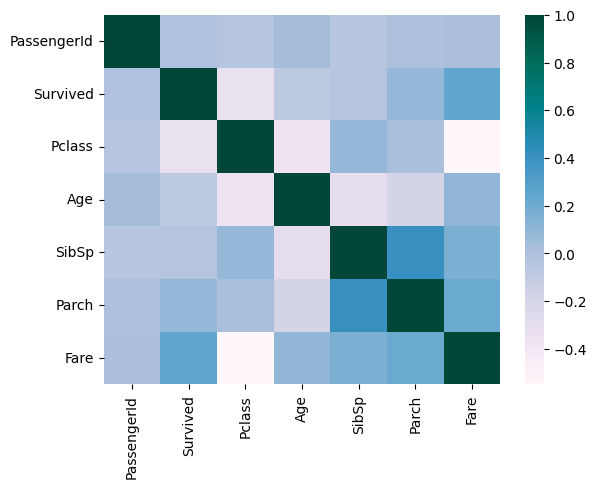

In [ ]:
sns.heatmap(train.corr(),cmap="PuBuGn")

This heatmap shows that features like PassengerId, Age and Siblings on board are not essential in determining the number of survivors.

# How can we visualize the survival rate of passengers based on different variables such as age, gender, and socio-economic class?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

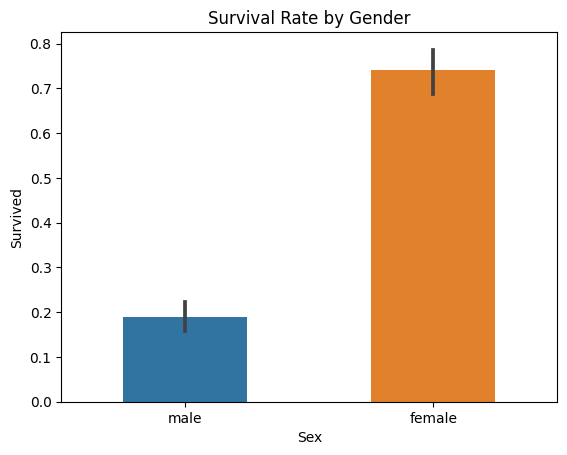

In [ ]:
sns.barplot(x=train['Sex'], y=train['Survived'], width = 0.5)
plt.title('Survival Rate by Gender')
plt.show()

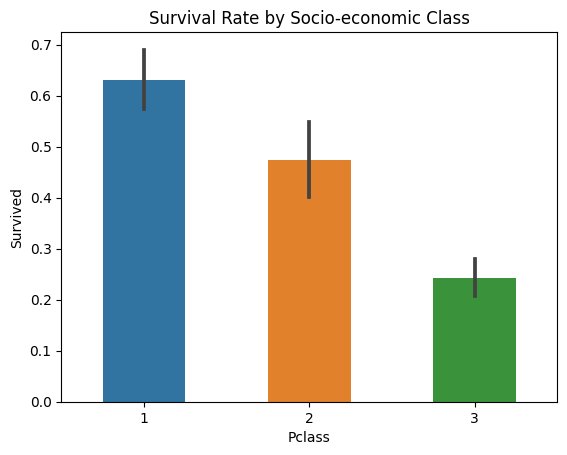

In [ ]:
sns.barplot(x=train['Pclass'], y=train['Survived'], width=0.5)
plt.title('Survival Rate by Socio-economic Class')
plt.show()

In [ ]:
# sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', kde=True)
# plt.title('Survival Distribution by Age')
# plt.show()

# Can we create visualizations to understand the relationship between different passenger characteristics (e.g., age, class) and survival?

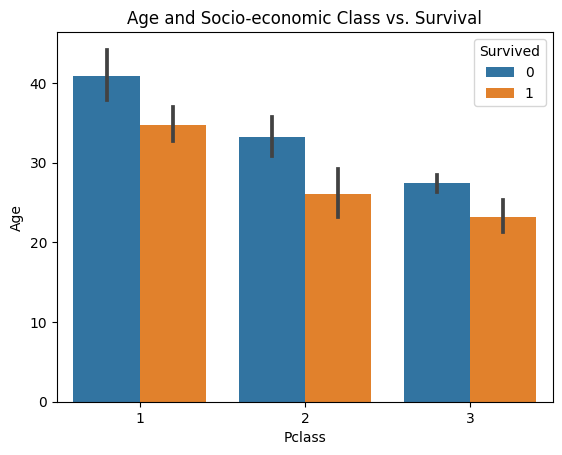

In [ ]:
sns.barplot(x=train['Pclass'], y=train['Age'], hue=train['Survived'])
plt.title('Age and Socio-economic Class vs. Survival')
plt.show()

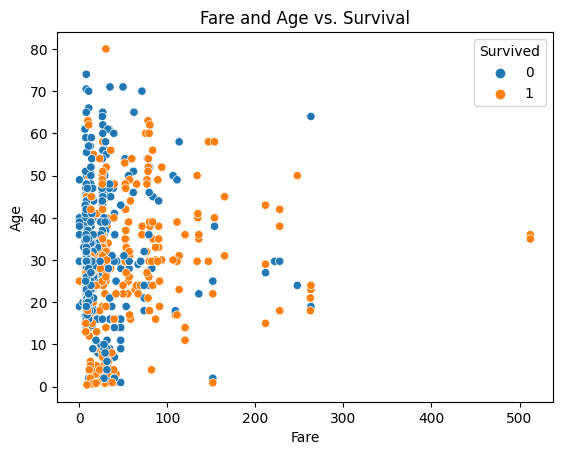

In [ ]:
sns.scatterplot(x=train['Fare'], y=train['Age'], hue=train['Survived'])
plt.title('Fare and Age vs. Survival')
plt.show()

# How can we visualize the distribution of different variables (e.g., age, fare) to identify any patterns or outliers?

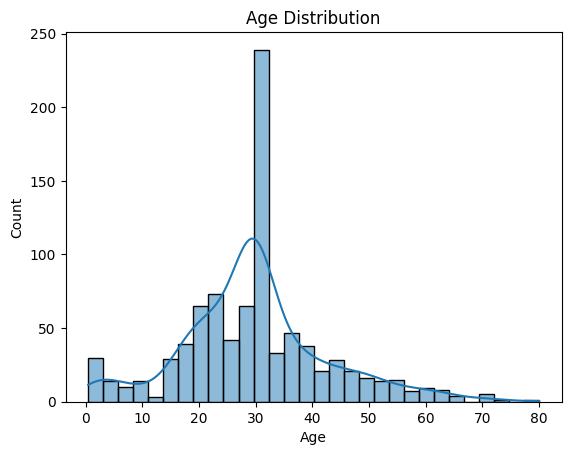

In [ ]:
sns.histplot(data=train, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

# Can we visualize the distribution of survivors and non-survivors based on different variables to gain insights into the factors that influenced survival?

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution of Survivors vs. Non-Survivors')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

# Logistic Regression to determine if a person survived or not

Pre-Processing Step

Since Age is a numeric value, we replace missing values with average of all Age values.

In [ ]:
avg = train['Age'].mean()

In [ ]:
train['Age'] = train['Age'].fillna(avg)

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin column contains string values, so we fill missing values as 'Unknown'.

In [ ]:
train['Cabin'] = train['Cabin'].fillna('Unknown')

Since only 2 values are missing from Embarked column, we replace them with the most frquent one.

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')

In [ ]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Factors like Name, PassengerId and Ticket Number are not relevant factors to determine the likeliness of survival.

In [ ]:
train = train.drop(['Name','PassengerId','Ticket'],axis=1)

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,Unknown,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,Unknown,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Unknown,S
887,1,1,female,19.000000,0,0,30.0000,B42,S
888,0,3,female,29.699118,1,2,23.4500,Unknown,S
889,1,1,male,26.000000,0,0,30.0000,C148,C


In [ ]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [ ]:
avg = test['Age'].mean()
test['Age'] = test['Age'].fillna(avg)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [ ]:
test['Cabin'] = test['Cabin'].fillna('Unknown')

In [ ]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [ ]:
avg = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(avg)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
test = test.drop(['Name','PassengerId','Ticket'],axis=1)

In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,7.8292,76,1
1,3,0,47.00000,1,0,7.0000,76,2
2,2,1,62.00000,0,0,9.6875,76,1
3,3,1,27.00000,0,0,8.6625,76,2
4,3,0,22.00000,1,1,12.2875,76,2
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,76,2
414,1,0,39.00000,0,0,108.9000,22,0
415,3,1,38.50000,0,0,7.2500,76,2
416,3,1,30.27259,0,0,8.0500,76,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])
train['Cabin'] = label_encoder.fit_transform(train['Cabin'])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
X_train = train.drop(['Survived'], axis=1)

In [ ]:
Y_train = train['Survived']

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.intercept_

array([5.04685041])

In [ ]:
model.coef_

array([[-0.79099528, -2.71038478, -0.03820507, -0.47761184, -0.05060665,
         0.00325824, -0.00514535, -0.07927416]])

In [ ]:
model.score(X_train, Y_train)

0.7968574635241302